Using Julia as a R user
==============
**Author:** 
- Caroline Cognot
- Florian Teste


# 0: Data to use for the tutorial


We can use the PalmerPenguins dataset (designed for Julia)
OR
Use the package RDatasets to use our favorite iris dataset.

In [48]:
using DataFrames
using DataFramesMeta

using PalmerPenguins


penguins = dropmissing(DataFrame(PalmerPenguins.load()))


333×7 DataFrame
 Row │ species    island     bill_length_mm  bill_depth_mm  flipper_length_mm  ⋯
     │ String15   String15   Float64         Float64        Int64              ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Adelie     Torgersen            39.1           18.7                181  ⋯
   2 │ Adelie     Torgersen            39.5           17.4                186
   3 │ Adelie     Torgersen            40.3           18.0                195
   4 │ Adelie     Torgersen            36.7           19.3                193
   5 │ Adelie     Torgersen            39.3           20.6                190  ⋯
   6 │ Adelie     Torgersen            38.9           17.8                181
   7 │ Adelie     Torgersen            39.2           19.6                195
   8 │ Adelie     Torgersen            41.1           17.6                182
  ⋮  │     ⋮          ⋮            ⋮               ⋮                ⋮          ⋱
 327 │ Chinstrap  Dream                46.8           16.5                189  ⋯
 328 │ Chinstrap  Dream                45.7           17.0                195
 329 │ Chinstrap  Dream                55.8           19.8                207
 330 │ Chinstrap  Dream                43.5           18.1                202
 331 │ Chinstrap  Dream                49.6           18.2                193  ⋯
 332 │ Chinstrap  Dream                50.8           19.0                210
 333 │ Chinstrap  Dream                50.2           18.7                198
                                                  2 columns and 318 rows omitted

In [34]:

using RDatasets
iris = dataset("datasets","iris")


150×5 DataFrame
 Row │ SepalLength  SepalWidth  PetalLength  PetalWidth  Species   
     │ Float64      Float64     Float64      Float64     Cat…      
─────┼─────────────────────────────────────────────────────────────
   1 │         5.1         3.5          1.4         0.2  setosa
   2 │         4.9         3.0          1.4         0.2  setosa
   3 │         4.7         3.2          1.3         0.2  setosa
   4 │         4.6         3.1          1.5         0.2  setosa
   5 │         5.0         3.6          1.4         0.2  setosa
   6 │         5.4         3.9          1.7         0.4  setosa
   7 │         4.6         3.4          1.4         0.3  setosa
   8 │         5.0         3.4          1.5         0.2  setosa
  ⋮  │      ⋮           ⋮            ⋮           ⋮           ⋮
 144 │         6.8         3.2          5.9         2.3  virginica
 145 │         6.7         3.3          5.7         2.5  virginica
 146 │         6.7         3.0          5.2         2.3  virginica
 147 │         6.3         2.5          5.0         1.9  virginica
 148 │         6.5         3.0          5.2         2.0  virginica
 149 │         6.2         3.4          5.4         2.3  virginica
 150 │         5.9         3.0          5.1         1.8  virginica
                                                   135 rows omitted



# Plots 

## list of available packages

List of packages for plots :

-   [**Plots**]
-   [**StatsPlots**]
-   [**Makie**]
-   [**TidierPlots**]
-   [**AlgebraOfGraphics**] uses Makie
-   [**GadFly**]


Other packages are available, see (https://discourse.julialang.org/t/comparison-of-plotting-packages/99860/2)


---



# 1. TidierPlots

https://tidierorg.github.io/TidierPlots.jl/latest/


The goal here is to be able to do the same sort of graphics as when using R ggplot2, that we all love.

Install the package using ], then add TidierPlots. It takes a long time.

The package supports ggplot(), and :

- some Geoms 
- some themes, with the default being the ggplot2 theme
- scale\_colour\_manual and discrete
- facetting with wrap and grid
- scale, labs,lims

TidierPlots uses AlgebraOfGraphics, which uses Makie. 

Example using a Julia dataframe :
 you need to run the  PalmerPenguins.load() in the console when doing it for the first time
and press y when it asks if you want the data downloaded.

Issues during the work : it stopped working. First we looked if the version was good.

-  ] status TidierPlots. 
- ] update TidierPlots : its not better
- remove it : rm TidierPlots
- install from github : 

There are many dependances, we update all packages before.
- using Pkg
- Pkg.update()

- Pkg.add("TidierPlots")


using TidierPlots



g=TidierPlots.ggplot(data = penguins) + 
    geom_bar(@aes(x = species)) +
    labs(x = "Species");
g

### Combining plots

Just like the *patchwork* package, we can combine plots, with + and | for horizontal and / for vertical.

(g+g)

g/(g+g)

g/g +g

((g + g + g) | g) / (g / g)

Warning ; the *aes* syntax exactly as ggplot2 does not exist. It has many equivalents

- @aes(x=x,y=y)
- @es(x=x,y=y)
- aes(x=:x,y=:y)
- aes(x="x",y="y")


g1=ggplot(penguins, @aes(x = bill_length_mm, y = bill_depth_mm, color = species)) +
    geom_point()
g2=ggplot(penguins, @aes(x=:bill_length_mm, y=:bill_depth_mm, color=:species)) +
geom_point()
g3=ggplot(penguins, aes(x = "bill_length_mm", y = "bill_depth_mm", color = "species")) +
geom_point()
g4=ggplot(penguins, @es(x = bill_length_mm, y = bill_depth_mm, color = species)) +
geom_point()

g1/g2+g3/g4

The different syntaxes gave the same results !
The rest of the code is exactly the same as in ggplot2.

### Issues

- Package still not stable. It downgrades others when using add, and the GitHub version has unresolved issues.
- It worked at some point (20/08/2024 afternoon) and then in the same evening stopped.

# 3: Gadfly


Gadfly is also based on ggplot2.

In [21]:
using Gadfly

The basic plotting function is also called plot.
The syntax when using a DataFrame is as follows :

plot(data::AbstractDataFrame, elements::Element...; mapping...)

It is not exactly the same as the ggplot2 syntax, but close.

Every information goes in the same plot() function call.
Notes :

- The default geometry is Geom.point.
- You can add other Geom 


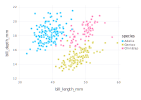

In [22]:
p = plot(penguins, x=:bill_length_mm, y=:bill_depth_mm,color=:species, Geom.point);
p

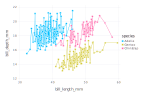

In [24]:
p = plot(penguins, x=:bill_length_mm, y=:bill_depth_mm,color=:species, Geom.point,Geom.line);
p

Saving a plot is done using the *draw* function.

Notes :

- default has no background.


In [23]:
img = SVG("penguin_plot.svg", 14cm, 8cm)
draw(img, p)

img = SVG("penguin_plot.png", 14cm, 8cm)
draw(img, p)

false

When using arrays instead of DataFrames, instead, use the data directly. However, the automatic axes do not exist and we have to add them manually using Guide.

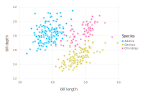

In [31]:
bill_length=penguins.bill_length_mm
bill_depth=penguins.bill_depth_mm
species = penguins.species
p = plot(x=bill_length,y=bill_depth,color=species, Geom.point,
Guide.xlabel("bill length"),Guide.ylabel("bill depth"),Guide.colorkey(title="Species"));
p

Color, and other aesthetics, can also be mapped by using arrays with group labels or functional types e.g. ["group label"] or [colorant"red"]. ["Group labels"] are added to the key.
[colorant"red"] are not added to the key, and not present in the legend of the plot.

layers allow different data to be used :

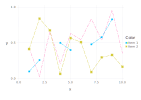

In [32]:
#example from Gadfly tutorial :
y1 = [0.1, 0.26, NaN, 0.5, 0.4, NaN, 0.48, 0.58, 0.83]
plot(x=1:9, y=y1, Geom.line, Geom.point,
        color=["Item 1"], linestyle=[:dash], size=[3pt],
    layer(x=1:10, y=rand(10), Geom.line, Geom.point,
        color=["Item 2"], size=[5pt], shape=[Shape.square]),
    layer(x=1:10, y=rand(10), color=[colorant"hotpink"],
        linestyle=[[8pt, 3pt, 2pt, 3pt]], Geom.line))

Example of layers not from the  (this does not make any sense as a graph but it is just to show another example with a DataFrame object )

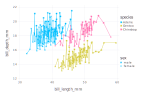

In [36]:
p = plot(penguins, x=:bill_length_mm, y=:bill_depth_mm,color=:species, Geom.line,
    layer(x=:bill_length_mm,y=:bill_depth_mm,shape=:sex,Geom.point));
    p


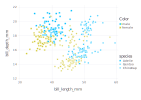

In [55]:
penguinm = @subset(penguins, :sex .== "male")
penguinf = @subset(penguins, :sex .== "female")

p = plot(penguinm, x=:bill_length_mm, y=:bill_depth_mm,color=["male"],shape=:species, Geom.point,
    layer(penguinf,x=:bill_length_mm,y=:bill_depth_mm,color=["female"],shape=:species,Geom.point));
    p
